Lasso

In [375]:
import sklearn
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [376]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Description of the dataset

In [377]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=2409)

As seen from lab5 we split it into training and test sets and fit a linear model to the training set

In [378]:
print(X_train.shape) # Check
print(X_test.shape)

(331, 10)
(111, 10)


In [379]:
from sklearn.linear_model import Lasso
ls = Lasso().fit(X_train,y_train)
ls.score(X_train,y_train)

0.3397079122572153

In [380]:
ls.score(X_test,y_test)

0.3292835912480715

In [382]:
import numpy as np
np.sum(ls.coef_ != 0)

3

Training and test R2 for the Lasso model

In [383]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

returns the names of the dataset columns

age,sex,bmi,bp,s1,s2,s3,s4,s5,s6 / In total it has 10 Features.
R2 = 3

In [346]:
X = np.genfromtxt("diabetes.data",skip_header=1,usecols=range(10))
X[:3]

array([[ 59.    ,   2.    ,  32.1   , 101.    , 157.    ,  93.2   ,
         38.    ,   4.    ,   4.8598,  87.    ],
       [ 48.    ,   1.    ,  21.6   ,  87.    , 183.    , 103.2   ,
         70.    ,   3.    ,   3.8918,  69.    ],
       [ 72.    ,   2.    ,  30.5   ,  93.    , 156.    ,  93.6   ,
         41.    ,   4.    ,   4.6728,  85.    ]])

After checking the file I examined that there are 10 columns,
also presence of a header in the file can hinder data processing, so we have to skip the header to get only integers
Used X[:3] as checker and for analysing later

In [347]:
y = np.genfromtxt('diabetes.data',skip_header=1,usecols=10)
y[:3]

array([151.,  75., 141.])

In [348]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state=2409)

Repetition of item 3 for current dataset

In [349]:
ls = Lasso().fit(X1_train,y1_train)
ls.score(X1_train, y1_train)

0.48205966121822574

In [350]:
ls.score(X1_test, y1_test)

0.5226179095176235

In [351]:
np.sum(ls.coef_ != 0)

9

In [352]:
ls.coef_

array([ -0.09287687, -14.79808797,   5.22376991,   1.26266079,
         0.8991142 ,  -1.0516787 ,  -1.68330898,  -0.        ,
        12.18617115,   0.40447343])

The results for this prediction is quite bad due to the number of the non-zeros seen.

In [353]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1_train)
# transform data
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)
# print dataset properties
print(X1_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X1_train_scaled.min(axis=0))
print(X1_train_scaled.max(axis=0))

(331, 10)
[-0.10722563 -0.04464164 -0.0902753  -0.1123996  -0.12678067 -0.11279473
 -0.09862541 -0.0763945  -0.12609739 -0.13776723]
[0.11072668 0.05068012 0.17055523 0.13204422 0.15391371 0.19878799
 0.18117906 0.18523444 0.13359898 0.13561183]
[-2.22650835 -0.88836321 -1.84124208 -2.3124947  -2.62392112 -2.31453088
 -2.11582488 -1.59554187 -2.65654384 -2.84042347]
[2.31897437 1.12566571 3.45281632 2.7238968  3.27080056 4.17784144
 3.81957414 4.05340088 2.88994388 2.88656233]


print dataset properties before and after scaling as a check

Repetition of item 3 as stated in item 8

In [354]:
ls = Lasso().fit(X1_train_scaled,y1_train)
ls.score(X1_train_scaled, y1_train)

0.4870509176624266

In [355]:
ls.score(X1_test_scaled, y1_test)

0.5455660184826467

In [356]:
np.sum(ls.coef_ != 0)

8

In [357]:
ls.coef_

array([-0.17576093, -8.45079926, 22.50232488, 16.68007139, -0.        ,
       -4.59233016, -9.18833453, -0.        , 20.75060403,  3.29483713])

After examination I think the results are very bad and may be erroneous as the number of non zeros is worse in this case in 
comparison to the first set of results. They are closer to the item 3 dataset then the normalised one.

In [358]:
alphas = np.array([0.05, 0.1, 0.25, 1, 3, 6, 12, 30]) # sample alphas
ls = Lasso(max_iter = 10000, normalize = True) # determine max iteration and set normalise to true
size = alphas.size  # store the size for the alphas
coefs = []    # initialise num of coef in this case features used
r2 = []   # initialize R2 for every aplha

# iterate through alphas to get R2 and features used not equal to 0
for a in range(size):
    ls.set_params(alpha=alphas[a])
    ls.fit(X1_train_scaled, y1_train)
    
    r2.append(ls.score(X1_train_scaled, y1_train))
    coefs.append(np.sum(ls.coef_ != 0)) 

Once I tested different ranges I found some did not converage as the gap was not 
enough thus needing more iterations, also tested that numbers under 0 are not 
appropriate.

Text(0.5, 1.0, 'R2 vs the number of features used')

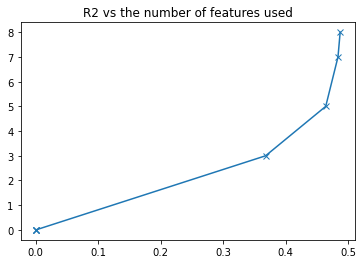

In [359]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(r2, coefs, marker='x')
plt.title("R2 vs the number of features used")

Although I did manage to make the curve look pretty I have identified that not all points have been covered

I prefer the model with 8 features at this point a clear incline can be seen relative to the features

In [390]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
# using cross validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X1_train_scaled, y1_train)
grid_search.score(X1_train_scaled, y1_train)

0.4870509176624266

From lab 6 we can see how sci tools can be used for cross validation

In [391]:
grid_search.score(X1_test_scaled, y1_test)

0.5455660184826467

The result seems higher

In [392]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1}
0.4386854097415188


In [393]:
grid_search.best_estimator_

Lasso(alpha=1)

In [394]:
print(np.sum(grid_search.best_estimator_.coef_ != 0))

8


In [395]:
calib_size = 99  #size of calibration set
# the training set proper
# must set test size to 99 to ensure x_cal is equal to 99
X_train_prop, X_cal, y_train_prop, y_cal = train_test_split(X1_train, y1_train, random_state=2409, test_size=99)
X_cal.shape # act as check

(99, 10)

In [396]:
# Preprocess the training set proper, calibration set, and test set
scaler = StandardScaler()
scaler.fit(X_train_prop)
X_train_trans = scaler.transform(X_train_prop)
X_calib_trans = scaler.transform(X_cal)
X_test_trans = scaler.transform(X1_test) 

In [397]:
param_grid = {'alpha': [0.01, 0.05, 0.1, 1, 12, 20, 50, 100]}
# train lasso for trainning proper set
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train_trans, y_train_prop)
y_hat = grid_search.predict(X_calib_trans)

In [398]:
alpha = abs(np.subtract(y_cal ,y_hat))
np.sort(alpha) # check difference

array([  1.02957948,   1.15590236,   1.19891392,   1.92465207,
         2.02742561,   2.14925056,   3.07849323,   3.13605325,
         4.60675284,   5.12251363,   5.26499923,   5.41385264,
         5.96900612,   7.74178261,   8.1527902 ,   8.27077957,
         8.56553495,   8.62605579,   9.61437165,   9.72429457,
         9.98488596,  10.22833226,  10.48251253,  10.49940228,
        15.72034509,  16.53951412,  16.92872318,  17.38185522,
        19.04095129,  20.4680191 ,  20.85847205,  22.60604216,
        23.66064097,  24.32225227,  25.65170477,  26.3246577 ,
        26.48653025,  27.47076069,  28.01337041,  28.10119427,
        29.19916139,  32.36112876,  34.35242101,  35.98197628,
        36.8288781 ,  37.2699265 ,  37.49018099,  37.87911293,
        39.24517446,  39.33778418,  44.37728316,  44.42490151,
        47.26744462,  48.09434904,  49.11602066,  49.69844062,
        49.77138215,  51.96990297,  52.97740504,  54.81796237,
        54.92458931,  55.09222612,  56.00099642,  56.10

In [399]:
# length of the prediction intervals for the test samples section
n5 = (1-0.05)*(calib_size+1)
n20=(1-0.2)*(calib_size+1)
sig5 = (alpha [int(n5) - 1])
sig20 = (alpha [int(n20) - 1])

print("Sig: ",sig5)
print("Sig: ",sig20)

Sig:  82.65510897729108
Sig:  70.43975127522103


In [400]:
lengthof5 = (sig5*2)
lengthof20 = (sig20*2)

In [401]:
print(lengthof5, lengthof20)

165.31021795458216 140.87950255044206


In [402]:
# Calculating the Test Error rate
num_err5 = 0.0 # initialise number of errors
num_err20 = 0.0 # initialise number of errors
test_size = y1_test.size # stores y1 test size
y_pred = grid_search.predict(X_test_trans) # test sample predictions

# iterate through tests
for i in range(test_size):
    if lengthof5 <= abs(y1_test[i]-y_pred[i]):
        num_err5 = num_err5+1
    if lengthof20 <= abs(y1_test[i]-y_pred[i]):
        num_err20 = num_err20+1

# stores the error rate percentages
Error_rate_5 = (num_err5 / test_size)  
Error_rate_20 = (num_err20 / test_size) 

print("5% ERROR RATE:", Error_rate_5)
print("20% ERROR RATE:", Error_rate_20)        

5% ERROR RATE: 0.0
20% ERROR RATE: 0.009009009009009009


Here are the percentage of error rates on the test set